In [15]:
import pandas as pd

# Load the data from the Excel file
file_path = '../shared_data_read_only/Opportunities.xlsx'
df = pd.read_excel(file_path)

# Display basic statistics of the loaded data
data_stats = df.describe()

# Print the statistics
print("Data Statistics:")
print(data_stats)

Data Statistics:
       Opportunity ID    Contact ID  Probability  Estimated amount  \
count     5986.000000   2791.000000  5986.000000      5.986000e+03   
mean      3206.113264  40921.821569   159.014367      2.247663e+04   
std       1872.836950   3876.070332   139.800661      1.562727e+05   
min          1.000000  35255.000000     0.000000      0.000000e+00   
25%       1536.250000  36515.000000   100.000000      5.000000e+02   
50%       3229.500000  41012.000000   100.000000      3.975000e+03   
75%       4846.750000  44477.500000   200.000000      1.000000e+04   
max       6387.000000  47664.000000  3000.000000      1.000000e+07   

       Amount received    Difference   Owner Name  Follow-up with  \
count     2.736000e+03  5.986000e+03  5736.000000      985.000000   
mean      1.817469e+04 -1.416958e+04    19.855474       16.784772   
std       7.518567e+04  1.264096e+05    10.771213       10.443050   
min       0.000000e+00 -8.215573e+06     1.000000        1.000000   
25%    

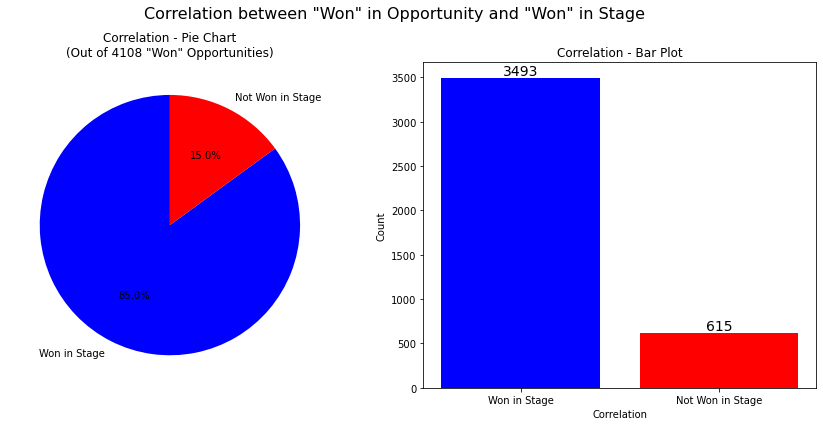

Insights:
Out of 4108 "Won" Opportunities,
- 3493 correspond to "Won" in the "Stage" column.
- 615 do not correspond to "Won" in the "Stage" column.
Percentage of "Won" Opportunities in "Won" Stage: 85.03%


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the Excel file
file_path = '../shared_data_read_only/Opportunities.xlsx'
df = pd.read_excel(file_path)

# Filter for 'Won' opportunities
won_opportunities = df[df['Status'] == 'Won']

# Count 'Won' opportunities that also have 'Won' in the 'Stage' column
num_won_in_stage = len(won_opportunities[won_opportunities['Stage'] == 'Won'])

# Count 'Won' opportunities that do not have 'Won' in the 'Stage' column
num_not_won_in_stage = len(won_opportunities[won_opportunities['Stage'] != 'Won'])

# Calculate the total count of 'Won' opportunities
total_won_opportunities = len(won_opportunities)

# Calculate the percentage of 'Won' opportunities in 'Won' stage
percentage_won_in_stage = (num_won_in_stage / total_won_opportunities) * 100

# Create a figure with subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart
labels = ['Won in Stage', 'Not Won in Stage']
values = [num_won_in_stage, num_not_won_in_stage]
ax[0].pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])
ax[0].set_title('Correlation - Pie Chart\n(Out of {} "Won" Opportunities)'.format(total_won_opportunities))

# Bar plot
labels = ['Won in Stage', 'Not Won in Stage']
values = [num_won_in_stage, num_not_won_in_stage]
ax[1].bar(labels, values, color=['blue', 'red'])
ax[1].set_xlabel('Correlation')
ax[1].set_ylabel('Count')
ax[1].set_title('Correlation - Bar Plot')

# Add annotations to the bar plot
for i, v in enumerate(values):
    ax[1].text(i, v, str(v), ha='center', va='bottom', fontsize=14)

# Display insights
insights = 'Insights:\n'
insights += 'Out of {} "Won" Opportunities,\n'.format(total_won_opportunities)
insights += '- {} correspond to "Won" in the "Stage" column.\n'.format(num_won_in_stage)
insights += '- {} do not correspond to "Won" in the "Stage" column.\n'.format(num_not_won_in_stage)
insights += 'Percentage of "Won" Opportunities in "Won" Stage: {:.2f}%'.format(percentage_won_in_stage)

plt.tight_layout()
plt.suptitle('Correlation between "Won" in Opportunity and "Won" in Stage', fontsize=16)
plt.subplots_adjust(top=0.85)
plt.show()

# Print the insights
print(insights)


In [19]:
import pandas as pd

# Load the data from the Excel file
df = pd.read_excel('../shared_data_read_only/Opportunities.xlsx')

# Extract unique values and their counts in the "Class" column
class_counts = df['Class'].value_counts()

# Print unique values and their counts
for class_value, count in class_counts.items():
    print(f"{class_value}: {count}")



Private partnership - Patronage: 2523
Private partnership - Event: 1251
Private partnership - Apprenticeship tax: 1118
Public partnership: 425
Campus - Room: 267
Campus - Field: 196
Campus - Event: 168
Private partnership - Donation in kind: 28
Private partnership - Skill sponsorship: 10


In [20]:
import pandas as pd

# Load the data from the Excel file
df = pd.read_excel('../shared_data_read_only/Opportunities.xlsx')

# Define the three categories
category1_keywords = ['Private partnership - Patronage', 'Private partnership - Event', 'Private partnership - Apprenticeship tax',
                      'Private partnership - Donation in kind', 'Private partnership - Skill sponsorship']
category2_keywords = ['Public partnership']
category3_keywords = ['Campus - Room', 'Campus - Field', 'Campus - Event']

# Initialize dictionaries to count occurrences in each category
category1_counts = {}
category2_counts = {}
category3_counts = {}

# Iterate through the DataFrame and count occurrences in each category
for class_value in df['Class']:
    if any(keyword in class_value for keyword in category1_keywords):
        if class_value in category1_counts:
            category1_counts[class_value] += 1
        else:
            category1_counts[class_value] = 1
    elif any(keyword in class_value for keyword in category2_keywords):
        if class_value in category2_counts:
            category2_counts[class_value] += 1
        else:
            category2_counts[class_value] = 1
    elif any(keyword in class_value for keyword in category3_keywords):
        if class_value in category3_counts:
            category3_counts[class_value] += 1
        else:
            category3_counts[class_value] = 1

# Print the counts for each category
print("Category 1:")
for class_value in sorted(category1_counts.keys()):
    print(f"{class_value}: {category1_counts[class_value]}")

print("\nCategory 2:")
for class_value in sorted(category2_counts.keys()):
    print(f"{class_value}: {category2_counts[class_value]}")

print("\nCategory 3:")
for class_value in sorted(category3_counts.keys()):
    print(f"{class_value}: {category3_counts[class_value]}")


Category 1:
Private partnership - Apprenticeship tax: 1118
Private partnership - Donation in kind: 28
Private partnership - Event: 1251
Private partnership - Patronage: 2523
Private partnership - Skill sponsorship: 10

Category 2:
Public partnership: 425

Category 3:
Campus - Event: 168
Campus - Field: 196
Campus - Room: 267


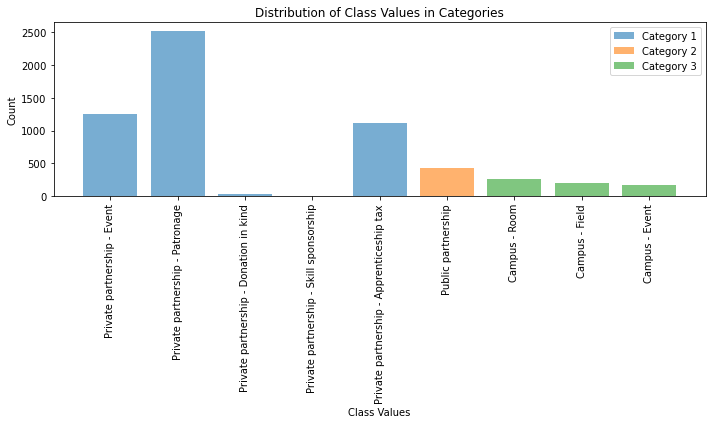

In [21]:
# Plot the distribution of values in each category
plt.figure(figsize=(10, 6))

plt.bar(category1_counts.keys(), category1_counts.values(), label='Category 1', alpha=0.6)
plt.bar(category2_counts.keys(), category2_counts.values(), label='Category 2', alpha=0.6)
plt.bar(category3_counts.keys(), category3_counts.values(), label='Category 3', alpha=0.6)

plt.xlabel('Class Values')
plt.ylabel('Count')
plt.title('Distribution of Class Values in Categories')
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

In [24]:
import pandas as pd

# Load the "Opportunities" DataFrame
opportunities_df = pd.read_excel('../shared_data_read_only/Opportunities.xlsx')

# Load the "Business Account" DataFrame
business_account_df = pd.read_excel('../shared_data_read_only/Business Account.xlsx')

# Check the column names in both DataFrames
print("Columns in 'Opportunities' DataFrame:")
print(opportunities_df.columns)

print("\nColumns in 'Business Account' DataFrame:")
print(business_account_df.columns)

Columns in 'Opportunities' DataFrame:
Index(['Opportunity ID', 'Business Account', 'Contact ID',
       'Estimated Close Date', 'Status', 'Stage', 'Probability',
       'Estimated amount', 'Amount received', 'Difference', 'Owner Name',
       'Follow-up with', 'Class ID', 'Class', 'Source', 'Source Campaign',
       'Campaign Name', 'Programme financé', 'Action financée', 'Agreement',
       'Signature date of the agreement', 'Agreement expiry date',
       'Duration of agreement (months)',
       'Deadline for submission of interim report', 'Final report deadline',
       'Type de contrat', 'Type de financement', 'Zone SDLV',
       'Theorical payment date 1', 'Theorical payment amount 1',
       'Theorical payment date 2', 'Theorical payment amount 2',
       'Theorical payment date 3', 'Theorical payment amount 3',
       'Theorical payment date 4', 'Theorical payment amount 4',
       'Theorical payment date 5', 'Theorical payment amount 5', 'Created On',
       'Last Modified Date

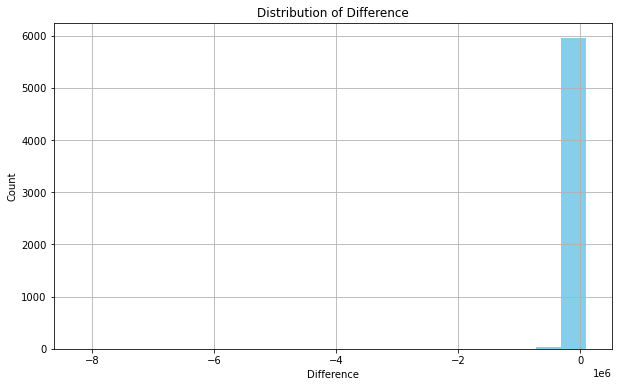

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the "Opportunities" DataFrame
opportunities_df = pd.read_excel('../shared_data_read_only/Opportunities.xlsx')

# Drop rows with missing values (NaN) in the "Difference" column
opportunities_df = opportunities_df.dropna(subset=['Difference'])

# Plot the "Difference" column
plt.figure(figsize=(10, 6))
plt.hist(opportunities_df['Difference'], bins=20, color='skyblue')
plt.xlabel('Difference')
plt.ylabel('Count')
plt.title('Distribution of Difference')
plt.grid(True)

plt.show()




In [26]:
import pandas as pd
import numpy as np

# Load the "Opportunities" DataFrame
opportunities_df = pd.read_excel('../shared_data_read_only/Opportunities.xlsx')

# Calculate the z-scores for the "Difference" column
z_scores = (opportunities_df['Difference'] - opportunities_df['Difference'].mean()) / opportunities_df['Difference'].std()

# Define a threshold for identifying outliers (e.g., z-score greater than 3 or less than -3)
outlier_threshold = 3

# Identify and print the outlier values
outliers = opportunities_df[abs(z_scores) > outlier_threshold]

print("Outlier Values in 'Difference' Column:")
print(outliers['Difference'])


Outlier Values in 'Difference' Column:
175     -500000.00
176     -450000.00
209     -450000.00
224     -592300.00
258     -600000.00
277    -2000000.00
311     -600000.00
322     -600000.00
335     -500000.00
339     -600000.00
348     -440634.93
376     -900000.00
582     -500000.00
608     -600000.00
1012    -500000.00
1733   -1500000.00
1781    -578319.00
1804   -1100000.00
1825    -620000.00
1826   -1300000.00
1842   -8215573.18
1868    -658181.00
2732   -1053000.00
2764    -400000.00
3566    -541667.00
3670    -400000.00
4139    -449000.00
4228   -1500000.00
4229    -723757.00
4580    -610000.00
4600    -425000.00
4632    -700000.00
5828    -700000.00
5897    -500000.00
5962   -1575000.00
Name: Difference, dtype: float64


In [25]:
import pandas as pd

# Load the "Opportunities" DataFrame
opportunities_df = pd.read_excel('../shared_data_read_only/Opportunities.xlsx')

# Define a function to remove outliers based on z-scores
def remove_outliers(df, column, threshold):
    z_scores = (df[column] - df[column].mean()) / df[column].std()
    return df[abs(z_scores) <= threshold]

# Set the threshold for identifying outliers
outlier_threshold = 3  # Adjust as needed

# Remove outliers from the "Difference" column
outliers_removed_df = remove_outliers(opportunities_df, 'Difference', outlier_threshold)

# Print the values that were removed (outliers)
outliers_df = opportunities_df[~opportunities_df.index.isin(outliers_removed_df.index)]
outlier_values = outliers_df['Difference']

print("Outlier Values Removed from 'Difference' Column:")
print(outlier_values)

# Print the cleaned DataFrame without outliers
print("\nCleaned DataFrame (Outliers Removed):")
print(outliers_removed_df)


Outlier Values Removed from 'Difference' Column:
175     -500000.00
176     -450000.00
209     -450000.00
224     -592300.00
258     -600000.00
277    -2000000.00
311     -600000.00
322     -600000.00
335     -500000.00
339     -600000.00
348     -440634.93
376     -900000.00
582     -500000.00
608     -600000.00
1012    -500000.00
1733   -1500000.00
1781    -578319.00
1804   -1100000.00
1825    -620000.00
1826   -1300000.00
1842   -8215573.18
1868    -658181.00
2732   -1053000.00
2764    -400000.00
3566    -541667.00
3670    -400000.00
4139    -449000.00
4228   -1500000.00
4229    -723757.00
4580    -610000.00
4600    -425000.00
4632    -700000.00
5828    -700000.00
5897    -500000.00
5962   -1575000.00
Name: Difference, dtype: float64

Cleaned DataFrame (Outliers Removed):
      Opportunity ID Business Account  Contact ID Estimated Close Date Status  \
0               6387           C00037     35334.0           2023-11-27    New   
1               6386           C01254     36240.0   

In [29]:
import pandas as pd

# Load the "Opportunities" DataFrame
opportunities_df = pd.read_excel('../shared_data_read_only/Opportunities.xlsx')

# Group the data by "Class" (sector) and "Status" and count the opportunities for each combination
sector_Status_counts = opportunities_df.groupby(['Class', 'Status']).size()

# Reset the index to make it easier to work with the DataFrame
sector_Status_counts = sector_Status_counts.reset_index(name='Count')

# Filter for opportunities with "Statuse" equal to 'Won'
won_opportunities = sector_Status_counts[sector_Status_counts['Status'] == 'Won']

# Print the sectors and the count of opportunities won for each sector
print("Classes performing in terms of opportunities won:")
print(won_opportunities)


Classes performing in terms of opportunities won:
                                       Class Status  Count
3                             Campus - Event    Won     86
7                             Campus - Field    Won    136
11                             Campus - Room    Won    168
13  Private partnership - Apprenticeship tax    Won   1106
16    Private partnership - Donation in kind    Won      4
20               Private partnership - Event    Won   1049
24           Private partnership - Patronage    Won   1372
26   Private partnership - Skill sponsorship    Won      1
30                        Public partnership    Won    186


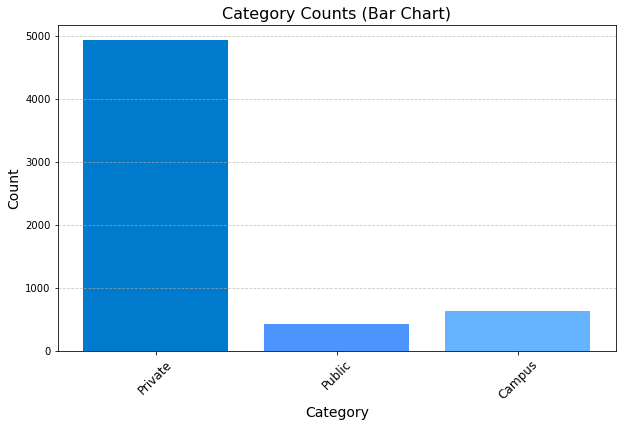

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the "Opportunities" DataFrame
df = pd.read_excel('../shared_data_read_only/Opportunities.xlsx')

# Define the category keywords
categories = {
    'Private': ['Private partnership - Patronage', 'Private partnership - Event', 'Private partnership - Apprenticeship tax', 'Private partnership - Donation in kind', 'Private partnership - Skill sponsorship'],
    'Public': ['Public partnership'],
    'Campus': ['Campus - Room', 'Campus - Field', 'Campus - Event']
}

# Define a diverse palette of blue colors
blue_palette = ['#0000FF', '#B0C4DE', '#B0E0E6', '#ADD8E6', '#87CEEB']

# Initialize a dictionary to count occurrences in each category
category_counts = {category: 0 for category in categories}

# Count occurrences in each category
for category, keywords in categories.items():
    category_counts[category] = df[df['Class'].isin(keywords)].shape[0]

# Define a diverse blue color palette
blue_palette = ['#007acc', '#4d94ff', '#66b3ff', '#99ccff', '#cce0ff']

# Create a bar chart to visualize category counts
plt.figure(figsize=(10, 6))
plt.bar(category_counts.keys(), category_counts.values(), color=blue_palette)
plt.xlabel('Category', fontsize=14)  # Increase the label font size
plt.ylabel('Count', fontsize=14)  # Increase the label font size
plt.title('Category Counts (Bar Chart)', fontsize=16)  # Increase the title font size
plt.xticks(rotation=45, fontsize=12)  # Increase category label font size and rotation
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Specify a filename and format for saving the figure
plt.savefig('category_counts.png', format='png')

# Display the plot
plt.show()



In [31]:
# print analytics on sectors 
import pandas as pd

# Load the "Business Account" DataFrame
df_business_account = pd.read_excel('shared_data_read_only/Business Account.xlsx')

# Print basic statistics for the "Activity sector" column
activity_sector_stats = df_business_account['Activity sector'].describe()

# Print the statistics
print("Statistics for 'Activity sector':")
print(activity_sector_stats)

# Get the top 10 most common values in the "Activity sector" column
top_10_activity_sectors = df_business_account['Activity sector'].value_counts().head(10)

# Print the top 10 values
print("Top 10 Activity Sectors:")
print(top_10_activity_sectors)

Statistics for 'Activity sector':
count                                                  1789
unique                                                   49
top       INSURANCE - BANKING - Banking, Insurance, Fina...
freq                                                    240
Name: Activity sector, dtype: object
Top 10 Activity Sectors:
INSURANCE - BANKING - Banking, Insurance, Finance, Investment funds    240
HEALTH - SOCIAL - Social, Associations, Foundations                    133
BUSINESS ADMINISTRATION - Consulting, Audit, Accounting                117
PUBLIC SECTOR - Local authorities, Regions, Municipalities             103
COMPUTING - TELECOM - Video games, Internet, E-Commerce                 77
COMMERCE - Retail, Other retail, Crafts                                 67
REAL ESTATE - Architecture, Real Estate                                 64
COMPUTING - TELECOM - Networks                                          57
BTP - Construction                                              

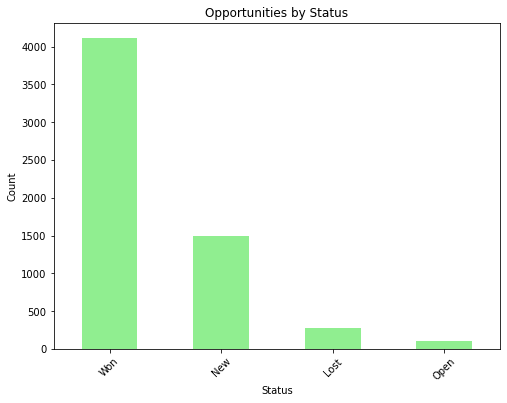

In [32]:
Status_counts = opportunities_df['Status'].value_counts()
plt.figure(figsize=(8, 6))
Status_counts.plot(kind='bar', color='lightgreen')
plt.title('Opportunities by Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [33]:
won_opportunities.columns


Index(['Class', 'Status', 'Count'], dtype='object')

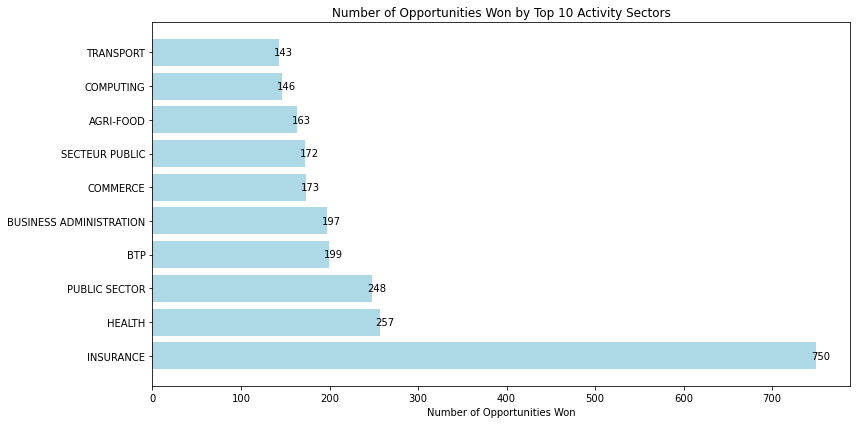

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the "Opportunities" DataFrame
opportunities_df = pd.read_excel('../shared_data_read_only/Opportunities.xlsx')

# Filter for opportunities with 'Won' Status
won_opportunities = opportunities_df[opportunities_df['Status'] == 'Won']

# Load the "Business Account" DataFrame
business_account_df = pd.read_excel('../shared_data_read_only/Business Account.xlsx')

# Merge the DataFrames on the common key ('Business Account')
merged_df = opportunities_df.merge(business_account_df, on='Business Account', how='inner')

# Calculate the number of opportunities won in each activity sector
activity_sector_won_counts = merged_df['Activity sector'].value_counts()

# Select the top 10 activity sectors with the most opportunities won
top_10_activity_sectors = activity_sector_won_counts.head(10)

# Truncate sector names at the '-' character
truncated_sector_names = [sector.split(" - ")[0] for sector in top_10_activity_sectors.index]

# Plot the number of opportunities won for the top 10 activity sectors with truncated names and labels
plt.figure(figsize=(12, 6))
bars = plt.barh(truncated_sector_names, top_10_activity_sectors, color='lightblue')
plt.xlabel('Number of Opportunities Won')
plt.title('Number of Opportunities Won by Top 10 Activity Sectors')
plt.tight_layout()

# Add labels for each bar
for bar in bars:
    width = bar.get_width()
    label_x = width + 5  # Adjust the position of the label
    plt.text(label_x, bar.get_y() + bar.get_height() / 2, f'{int(width)}', ha='center', va='center')

# Display the plot
plt.show()

#drop N/A in Amount received, as str, and put toghetder public sector ans secteur public. 

INSURANCE - BANKING - Banking, Insurance, Finance, Investment funds: 368 opportunities won
PUBLIC SECTOR - Local authorities, Regions, Municipalities: 143 opportunities won
HEALTH - SOCIAL - Social, Associations, Foundations: 118 opportunities won
SECTEUR PUBLIC - Etat & ses établissements publics: 99 opportunities won
BUSINESS ADMINISTRATION - Consulting, Audit, Accounting: 95 opportunities won
BTP - Construction: 89 opportunities won
COMMERCE - Retail, Other retail, Crafts: 82 opportunities won
TRANSPORT - Freight transport, logistics: 80 opportunities won
AGRI-FOOD - Food: 79 opportunities won
COMPUTING - TELECOM - Video games, Internet, E-Commerce: 75 opportunities won


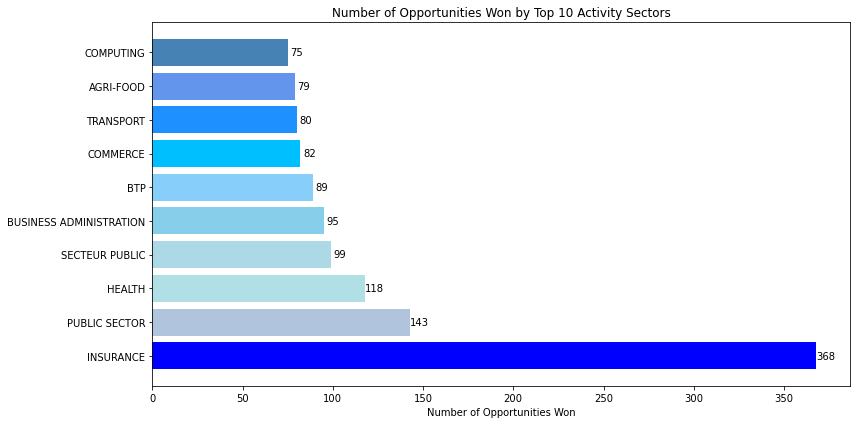

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the "Opportunities" DataFrame
opportunities_df = pd.read_excel('../shared_data_read_only/Opportunities.xlsx')

# Filter for opportunities with 'Won' Status
won_opportunities = opportunities_df[opportunities_df['Status'] == 'Won']

# Load the "Business Account" DataFrame
business_account_df = pd.read_excel('../shared_data_read_only/Business Account.xlsx')

# Merge the DataFrames on the common key ('Business Account')
merged_df = opportunities_df.merge(business_account_df, on='Business Account', how='inner')

# Drop missing values in the 'Amount received' column
merged_df = merged_df.dropna(subset=['Amount received'])

# Combine 'public sector' and 'secteur public'
merged_df['Activity sector'] = merged_df['Activity sector'].replace({'public sector': 'secteur public'})

# Calculate the number of opportunities won in each activity sector
activity_sector_won_counts = merged_df['Activity sector'].value_counts()

# Select the top 10 activity sectors with the most opportunities won
top_10_activity_sectors = activity_sector_won_counts.head(10)

# Truncate sector names at the '-' character
truncated_sector_names = [sector.split(" - ")[0] for sector in top_10_activity_sectors.index]

# Define a custom color palette with the Hex codes
custom_palette = ['#0000FF', '#B0C4DE', '#B0E0E6', '#ADD8E6', '#87CEEB',
                  '#87CEFA', '#00BFFF', '#1E90FF', '#6495ED', '#4682B4']

# Plot the number of opportunities won for the top 10 activity sectors with truncated names and the custom color palette
plt.figure(figsize=(12, 6))
bars = plt.barh(truncated_sector_names, top_10_activity_sectors, color=custom_palette)
plt.xlabel('Number of Opportunities Won')
plt.title('Number of Opportunities Won by Top 10 Activity Sectors')
plt.tight_layout()

# Add labels for each bar with the number of opportunities won
for bar in bars:
    width = bar.get_width()
    label_x = width + 5  # Adjust the position of the label
    plt.text(label_x, bar.get_y() + bar.get_height() / 2, f'{int(width)}', ha='center', va='center')

# Print the number of opportunities won for each sector
for sector, count in top_10_activity_sectors.items():
    print(f"{sector}: {count} opportunities won")

# Save the plot as an image (e.g., in PNG format)
plt.savefig('opportunities_plot.png', format='png')

# Display the plot
plt.show()



INSURANCE - BANKING - Banking, Insurance, Finance, Investment funds: 368 opportunities won
SECTEUR PUBLIC - Local authorities, Regions, Municipalities: 143 opportunities won
HEALTH - SOCIAL - Social, Associations, Foundations: 118 opportunities won
SECTEUR PUBLIC - Etat & ses établissements publics: 99 opportunities won
BUSINESS ADMINISTRATION - Consulting, Audit, Accounting: 95 opportunities won
BTP - Construction: 89 opportunities won
COMMERCE - Retail, Other retail, Crafts: 82 opportunities won
TRANSPORT - Freight transport, logistics: 80 opportunities won
AGRI-FOOD - Food: 79 opportunities won
COMPUTING - TELECOM - Video games, Internet, E-Commerce: 75 opportunities won


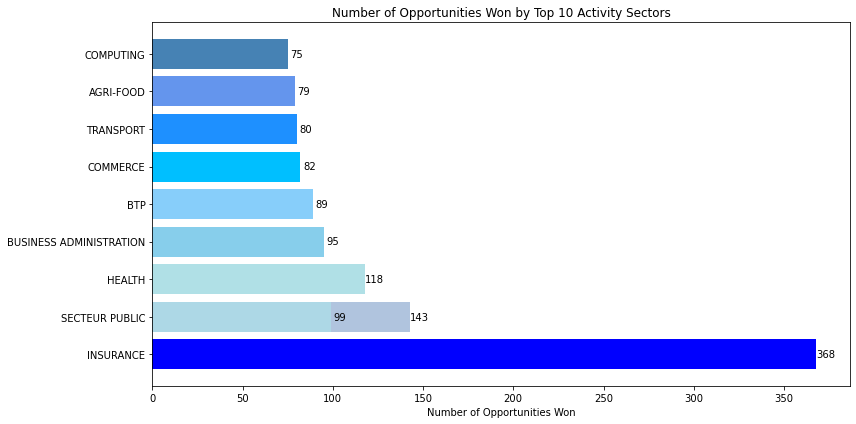

In [87]:

import matplotlib.pyplot as plt

# Load the "Opportunities" DataFrame
opportunities_df = pd.read_excel('../shared_data_read_only/Opportunities.xlsx')

# Filter for opportunities with 'Won' Status
won_opportunities = opportunities_df[opportunities_df['Status'] == 'Won']

# Load the "Business Account" DataFrame
business_account_df = pd.read_excel('../shared_data_read_only/Business Account.xlsx')

# Merge the DataFrames on the common key ('Business Account')
merged_df = opportunities_df.merge(business_account_df, on='Business Account', how='inner')

# Drop missing values in the 'Amount received' column
merged_df = merged_df.dropna(subset=['Amount received'])

# Merge 'PUBLIC SECTOR' and 'SECTEUR PUBLIC' into a single category 'SECTEUR PUBLIC'
merged_df['Activity sector'] = merged_df['Activity sector'].str.replace('PUBLIC SECTOR', 'SECTEUR PUBLIC')

# Calculate the number of opportunities won in each activity sector
activity_sector_won_counts = merged_df['Activity sector'].value_counts()

# Select the top 10 activity sectors with the most opportunities won
top_10_activity_sectors = activity_sector_won_counts.head(10)

# Truncate sector names at the '-' character
truncated_sector_names = [sector.split(" - ")[0] for sector in top_10_activity_sectors.index]

# Define a custom color palette with the Hex codes
custom_palette = ['#0000FF', '#B0C4DE', '#B0E0E6', '#ADD8E6', '#87CEEB',
                  '#87CEFA', '#00BFFF', '#1E90FF', '#6495ED', '#4682B4']

# Plot the number of opportunities won for the top 10 activity sectors with truncated names and the custom color palette
plt.figure(figsize=(12, 6))
bars = plt.barh(truncated_sector_names, top_10_activity_sectors, color=custom_palette)
plt.xlabel('Number of Opportunities Won')
plt.title('Number of Opportunities Won by Top 10 Activity Sectors')
plt.tight_layout()

# Add labels for each bar with the number of opportunities won
for bar in bars:
    width = bar.get_width()
    label_x = width + 5  # Adjust the position of the label
    plt.text(label_x, bar.get_y() + bar.get_height() / 2, f'{int(width)}', ha='center', va='center')

# Print the number of opportunities won for each sector
for sector, count in top_10_activity_sectors.items():
    print(f"{sector}: {count} opportunities won")

# Save the plot as an image (e.g., in PNG format)
plt.savefig('opportunities_plot.png', format='png')

# Display the plot
plt.show()


In [39]:
import pandas as pd

# Load the "Opportunities" DataFrame
opportunities_df = pd.read_excel('../shared_data_read_only/Opportunities.xlsx')

# Filter for opportunities with 'Won' Status
won_opportunities = opportunities_df[opportunities_df['Status'] == 'Won']

# Load the "Business Account" DataFrame
business_account_df = pd.read_excel('../shared_data_read_only/Business Account.xlsx')

# Merge the DataFrames on the common key ('Business Account')
merged_df = opportunities_df.merge(business_account_df, on='Business Account', how='inner')

# Calculate the number of opportunities won in each activity sector
activity_sector_won_counts = merged_df['Activity sector'].value_counts()

# Print the number of opportunities won by sector
print("Number of Opportunities Won by Activity Sector:")
print(activity_sector_won_counts)


Number of Opportunities Won by Activity Sector:
INSURANCE - BANKING - Banking, Insurance, Finance, Investment funds            750
HEALTH - SOCIAL - Social, Associations, Foundations                            257
PUBLIC SECTOR - Local authorities, Regions, Municipalities                     248
BTP - Construction                                                             199
BUSINESS ADMINISTRATION - Consulting, Audit, Accounting                        197
COMMERCE - Retail, Other retail, Crafts                                        173
SECTEUR PUBLIC - Etat & ses établissements publics                             172
AGRI-FOOD - Food                                                               163
COMPUTING - TELECOM - Video games, Internet, E-Commerce                        146
TRANSPORT - Freight transport, logistics                                       143
HEALTH - SOCIAL - Medical                                                      132
INDUSTRIES - Fashion, Textiles, Leather

In [40]:
# pourcentage of amount received comparet to the amount Estimated amount, dropping the NA.

import pandas as pd

# Load the "Opportunities" DataFrame
opportunities_df = pd.read_excel('../shared_data_read_only/Opportunities.xlsx')

# Filter for opportunities with 'Won' stage
won_opportunities = opportunities_df[opportunities_df['Stage'] == 'Won']

# Drop rows with missing values in 'Amount received' or 'Estimated amount'
won_opportunities = won_opportunities.dropna(subset=['Amount received', 'Estimated amount'])

# Calculate the percentage of amount received compared to estimated amount
won_opportunities['Percentage Received'] = (won_opportunities['Amount received'] / won_opportunities['Estimated amount']) * 100

# Print the DataFrame with the calculated percentage
print(won_opportunities[['Opportunity ID', 'Amount received', 'Estimated amount', 'Percentage Received']])
# Display the top rows with the calculated percentage
print(won_opportunities[['Opportunity ID', 'Amount received', 'Estimated amount', 'Percentage Received']].head())


      Opportunity ID  Amount received  Estimated amount  Percentage Received
212             6174          9000.00            9000.0           100.000000
259             6126          7620.00            7620.0           100.000000
425             5957         30000.00           30000.0           100.000000
445             5935           320.00             320.0           100.000000
447             5933           320.00             320.0           100.000000
...              ...              ...               ...                  ...
5944              43          5000.00            5000.0           100.000000
5959              28         20000.00           20000.0           100.000000
5972              14         65000.00          130000.0            50.000000
5980               6          3533.08           17533.0            20.151029
5982               4          7500.00            7500.0           100.000000

[2168 rows x 4 columns]
     Opportunity ID  Amount received  Estimated amo

In [42]:
import pandas as pd

# Load the "Opportunities" DataFrame
opportunities_df = pd.read_excel('../shared_data_read_only/Opportunities.xlsx')

# Filter for opportunities with 'Won' stage
won_opportunities = opportunities_df[opportunities_df['Stage'] == 'Won']

# Drop rows with missing values in 'Amount received' or 'Estimated amount'
won_opportunities = won_opportunities.dropna(subset=['Amount received', 'Estimated amount'])

# Calculate the overall percentage of amount received compared to estimated amount
overall_percentage = (won_opportunities['Amount received'].sum() / won_opportunities['Estimated amount'].sum()) * 100

# Print the overall percentage
print(f"Overall Percentage of 'Amount received' compared to 'Estimated amount': {overall_percentage:.2f}%")


Overall Percentage of 'Amount received' compared to 'Estimated amount': 77.64%


In [43]:
import pandas as pd

# Load the "Opportunities" DataFrame
opportunities_df = pd.read_excel('../shared_data_read_only/Opportunities.xlsx')

# Filter for opportunities with 'Won' status
won_opportunities = opportunities_df[opportunities_df['Status'] == 'Won']

# Drop rows with missing values in 'Amount received' or 'Estimated amount'
won_opportunities = won_opportunities.dropna(subset=['Amount received', 'Estimated amount'])

# Calculate the overall percentage of amount received compared to estimated amount
overall_percentage = (won_opportunities['Amount received'].sum() / won_opportunities['Estimated amount'].sum()) * 100

# Print the overall percentage
print(f"Overall Percentage of 'Amount received' compared to 'Estimated amount' for 'Won' status: {overall_percentage:.2f}%")


Overall Percentage of 'Amount received' compared to 'Estimated amount' for 'Won' status: 97.69%


In [49]:
#opportunities : progammes
import pandas as pd

# Load the "Opportunities" DataFrame
opportunities_df = pd.read_excel('../shared_data_read_only/Opportunities.xlsx')

# Filter for opportunities with a 'Won' stage
won_opportunities = opportunities_df[opportunities_df['Stage'] == 'Won']

# Group the opportunities by "Programme financier" and calculate the total investment for each
investment_by_program = won_opportunities.groupby('Programme financé')['Amount received'].sum()

# Find the "Programme financier" with the highest total investment
max_investment_program = investment_by_program.idxmax()
max_investment_value = investment_by_program[max_investment_program]

# Print the result
print(f"The financial program with the most investment is '{max_investment_program}' with a total investment of ${max_investment_value:.2f}")


The financial program with the most investment is 'Job dans la Ville' with a total investment of $10324165.55


In [51]:
# Calculate the total amount received for the top financial program
total_amount_received = won_opportunities[won_opportunities['Programme financé'] == max_investment_program]['Amount received'].sum()

# Calculate the percentage it represents
percentage_of_total = (total_amount_received / won_opportunities['Amount received'].sum()) * 100

# Print the results
print(f"Total amount received for '{max_investment_program}': ${total_amount_received:.2f}")
print(f"This represents {percentage_of_total:.2f}% of the total amount received in 'Won' opportunities.")


Total amount received for 'Job dans la Ville': $10324165.55
This represents 25.73% of the total amount received in 'Won' opportunities.


In [53]:
    # BUSINESS ACOUNT: quels sont ceux qui apportent le plus? 
    # code dans : Business Account du df: opportunities, selectionner les 3 qui ont un Amount received plus élévé, avec le pourcentage de l'amount total que cela represente.
import pandas as pd

# Load the "Opportunities" DataFrame
opportunities_df = pd.read_excel('../shared_data_read_only/Opportunities.xlsx')

# Filter for opportunities with a 'Won' stage
won_opportunities = opportunities_df[opportunities_df['Stage'] == 'Won']

# Load the "Business Account" DataFrame
business_account_df = pd.read_excel('../shared_data_read_only/Business Account.xlsx')

# Merge the DataFrames based on the common key, which is likely 'Business Account'
merged_df = won_opportunities.merge(business_account_df, on='Business Account', how='left')

# Calculate the total Amount Received for each Business Account
amount_received_by_account = merged_df.groupby('Business Account')['Amount received'].sum()

# Sort the results in descending order to find the top contributors
top_contributors = amount_received_by_account.sort_values(ascending=False)

# Print the top contributors
print("Top Business Accounts Contributing the Most:")
print(top_contributors)




Top Business Accounts Contributing the Most:
Business Account
C00296    1965000.00
C01502    1467132.50
C01388    1423407.79
C01533    1311692.50
C01196    1263384.96
             ...    
C06712          0.00
C06702          0.00
C06564          0.00
C00293          0.00
C06799          0.00
Name: Amount received, Length: 1326, dtype: float64


In [57]:
import pandas as pd

# Load the "Opportunities" DataFrame
opportunities_df = pd.read_excel('../shared_data_read_only/Opportunities.xlsx')

# Filter for opportunities with a 'Won' stage
won_opportunities = opportunities_df[opportunities_df['Stage'] == 'Won']

# Load the "Business Account" DataFrame
business_account_df = pd.read_excel('../shared_data_read_only/Business Account.xlsx')

# Merge the DataFrames based on the common key, which is likely 'Business Account'
merged_df = won_opportunities.merge(business_account_df, on='Business Account', how='left')

# Calculate the total Amount Received for each Business Account
amount_received_by_account = merged_df.groupby('Business Account')['Amount received'].sum()

# Sort the results in descending order to find the top contributors
top_contributors = amount_received_by_account.sort_values(ascending=False)

# Get the top 5 contributors
top_5_contributors = top_contributors.head(5)

# Calculate the total Amount Received in all opportunities
total_amount_received = won_opportunities['Amount received'].sum()

# Calculate the percentage of total Amount Received for each of the top 5 contributors
percentage_of_total = (top_5_contributors / total_amount_received) * 100

# Print the top 5 contributors, their Class, and their percentage of the total
print("Top 5 Business Accounts Contributing the Most:")
print(top_5_contributors)
print("\nPercentage of Total Amount Received:")
print(percentage_of_total)



Top 5 Business Accounts Contributing the Most:
Business Account
C00296    1965000.00
C01502    1467132.50
C01388    1423407.79
C01533    1311692.50
C01196    1263384.96
Name: Amount received, dtype: float64

Percentage of Total Amount Received:
Business Account
C00296    4.896740
C01502    3.656064
C01388    3.547103
C01533    3.268711
C01196    3.148330
Name: Amount received, dtype: float64


ValueError: 'explode' must be of length 'x'

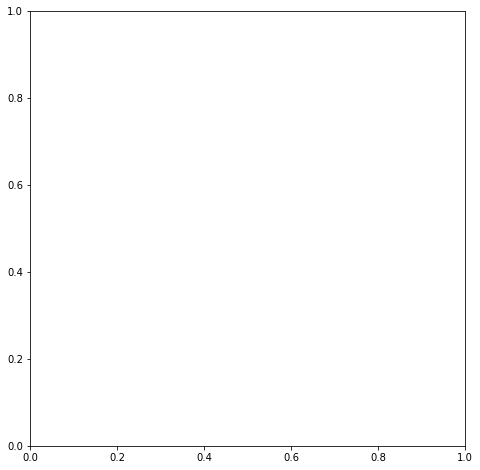

In [97]:
#pie chart of Programme financé. make sure to cluster all the possibility in 5 classes 
import matplotlib.pyplot as plt

# Create a mapping for clustering the programs
program_clusters = {
    "SPORT ET PÉDAGOGIE": "Cluster 1",
    "SÉJOURS ET EXPÉRIENCES INTERNATIONALES": "Cluster 1",
    "RÉUSSITE DANS LA VILLE": "Cluster 1",
    "L DANS LA VILLE": "Cluster 2",
    "JOB. Dans la ville": "Cluster 2",
    "ENTREPRENEURS DANS LA VILLE": "Cluster 3",
    # Add more programs and clusters as needed
}

# Group and sum the total amount received by clusters
grouped_programs = won_opportunities.replace({"Programme financé": program_clusters}).groupby("Programme financé")["Amount received"].sum()

# Create a pie chart
labels = grouped_programs.index
sizes = grouped_programs.values
colors = plt.cm.Paired(range(len(labels)))  # Generate a color for each cluster
explode = (0.1, 0, 0)  # To emphasize a particular slice (optional)

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title("Distribution of Amount Received by 'Programme financé' Clusters")

# Display the pie chart
plt.show()


In [98]:
# Calculate the total amount received for each unique program
program_totals = won_opportunities.groupby('Programme financé')['Amount received'].sum()

# Sort the programs by total amount received in descending order
program_totals = program_totals.sort_values(ascending=False)

# Print the values for 'Programme financé' and their corresponding total amounts received
for program, total_amount in program_totals.items():
    print(f"{program}: {total_amount:.2f}")


Séjours et Camps: 7121035.00
Job dans la Ville: 7100172.26
Non fléché: 3912598.12
Sport: 2672011.37
Entrepreneurs dans la Ville: 2493693.38
L dans la Ville: 1920696.20
Job dans la Ville, L dans la Ville: 515500.00
Job dans la Ville, Entrepreneurs dans la Ville: 402000.00
Sport, Job dans la Ville: 378250.00
Non fléché, Job dans la Ville: 200000.00
Réussite dans la Ville: 78800.00
Sport, Entrepreneurs dans la Ville: 60000.00
Non fléché, Sport, Job dans la Ville: 50000.00
Sport, Job dans la Ville, L dans la Ville: 39214.00
Réussite dans la Ville, Séjours et Camps: 15000.00
Non fléché, Réussite dans la Ville: 15000.00
L dans la Ville, Séjours et Camps: 12000.00
Sport, Job dans la Ville, Réussite dans la Ville: 5695.00
Sport, Job dans la Ville, Séjours et Camps: 3000.00
Non fléché, Sport, Job dans la Ville, L dans la Ville: 2000.00
Job dans la Ville, L dans la Ville, Entrepreneurs dans la Ville: 2000.00
Non fléché, Sport: 1377.32


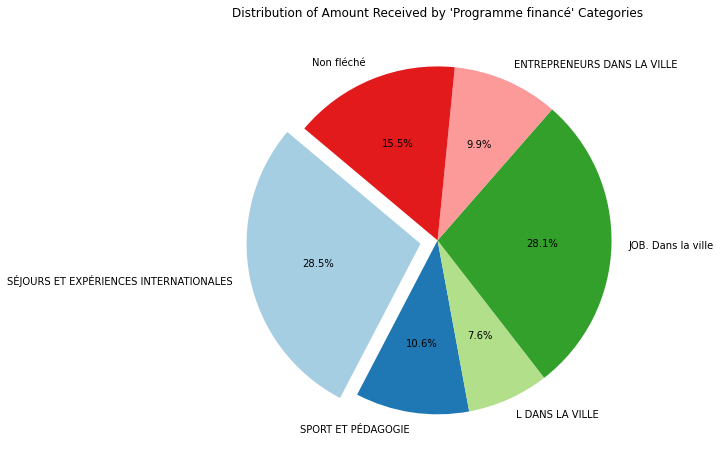

In [99]:
import matplotlib.pyplot as plt

# Create a mapping of program categories
program_categories = {
    'SÉJOURS ET EXPÉRIENCES INTERNATIONALES': ['Séjours et Camps', 'Réussite dans la Ville'],
    'SPORT ET PÉDAGOGIE': ['Sport'],
    'L DANS LA VILLE': ['L dans la Ville'],
    'JOB. Dans la ville': ['Job dans la Ville'],
    'ENTREPRENEURS DANS LA VILLE': ['Entrepreneurs dans la Ville'],
    'Non fléché': ['Non fléché']
}

# Calculate the total amount received for each program category
category_totals = {}

for category, programs in program_categories.items():
    total_amount = 0
    for program in programs:
        total_amount += program_totals.get(program, 0)
    category_totals[category] = total_amount

# Create a pie chart for the program categories
labels = category_totals.keys()
sizes = category_totals.values()
colors = plt.cm.Paired(range(len(labels)))  # Generate a color for each category
explode = (0.1, 0, 0, 0, 0, 0)  # To emphasize a particular slice (optional)

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title("Distribution of Amount Received by 'Programme financé' Categories")

# Display the pie chart
plt.show()



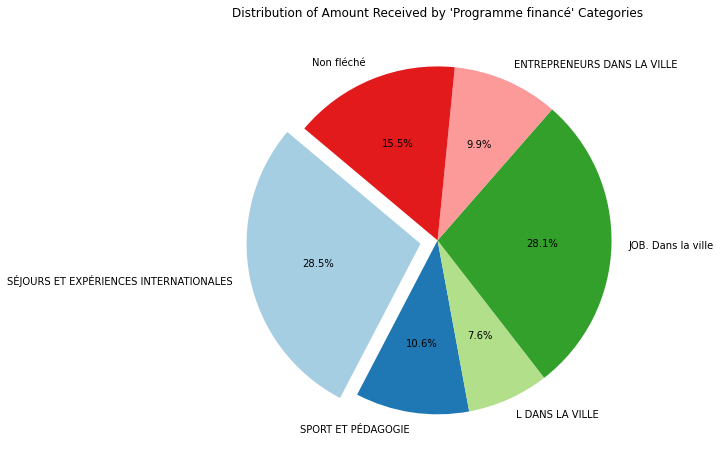

In [102]:
import matplotlib.pyplot as plt

# Create a mapping of program categories
program_categories = {
    'SÉJOURS ET EXPÉRIENCES INTERNATIONALES': ['Séjours et Camps', 'Réussite dans la Ville'],
    'SPORT ET PÉDAGOGIE': ['Sport'],
    'L DANS LA VILLE': ['L dans la Ville'],
    'JOB. Dans la ville': ['Job dans la Ville'],
    'ENTREPRENEURS DANS LA VILLE': ['Entrepreneurs dans la Ville'],
    'Non fléché': ['Non fléché']
}

# Calculate the total amount received for each program category
category_totals = {}

for category, programs in program_categories.items():
    total_amount = 0
    for program in programs:
        total_amount += program_totals.get(program, 0)
    category_totals[category] = total_amount

# Define the colors for the pie chart
colors = ['#0000FF', '#B0C4DE', '#B0E0E6', '#ADD8E6', '#87CEEB', '#87CEFA']

# Create a pie chart for the program categories
labels = category_totals.keys()
sizes = category_totals.values()

# Apply a gradient effect based on size
gradient = plt.cm.Paired(range(len(labels)))  # Create a gradient colormap
colors = [gradient[i] for i in range(len(labels))]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=(0.1, 0, 0, 0, 0, 0))
plt.title("Distribution of Amount Received by 'Programme financé' Categories")

# Save the pie chart as an image
plt.savefig('pie_chart.png', format='png')

# Display the pie chart
plt.show()



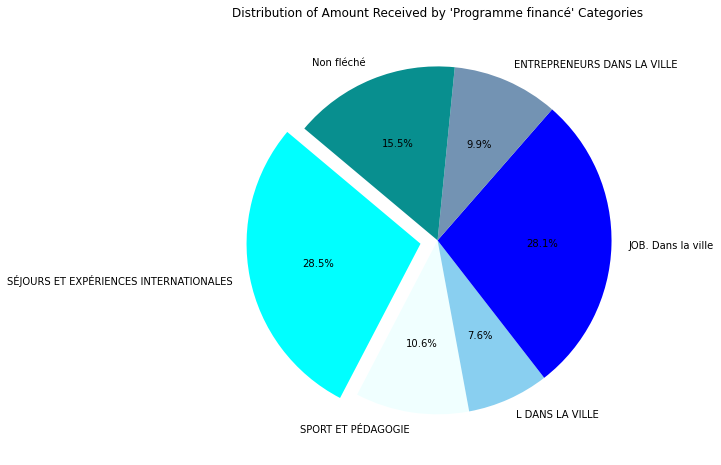

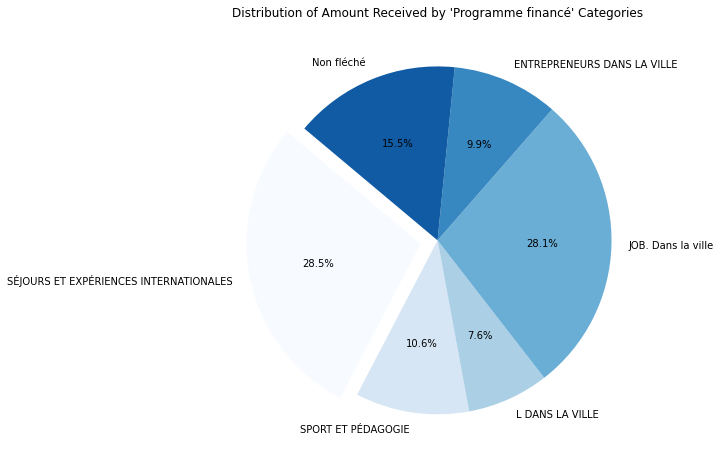

In [103]:
import matplotlib.pyplot as plt

# Create a mapping of program categories
program_categories = {
    'SÉJOURS ET EXPÉRIENCES INTERNATIONALES': ['Séjours et Camps', 'Réussite dans la Ville'],
    'SPORT ET PÉDAGOGIE': ['Sport'],
    'L DANS LA VILLE': ['L dans la Ville'],
    'JOB. Dans la ville': ['Job dans la Ville'],
    'ENTREPRENEURS DANS LA VILLE': ['Entrepreneurs dans la Ville'],
    'Non fléché': ['Non fléché']
}

# Calculate the total amount received for each program category
category_totals = {}

for category, programs in program_categories.items():
    total_amount = 0
    for program in programs:
        total_amount += program_totals.get(program, 0)
    category_totals[category] = total_amount

# Define a gradient of blue colors
num_categories = len(category_totals)
colors = plt.cm.Blues([i / num_categories for i in range(num_categories)])

# Create a pie chart for the program categories
labels = category_totals.keys()
sizes = category_totals.values()

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=(0.1, 0, 0, 0, 0, 0))
plt.title("Distribution of Amount Received by 'Programme financé' Categories")

# Save the pie chart as an image (e.g., in PNG format)
plt.savefig('pie_chart_with_gradient.png', format='png')

# Display the pie chart
plt.show()


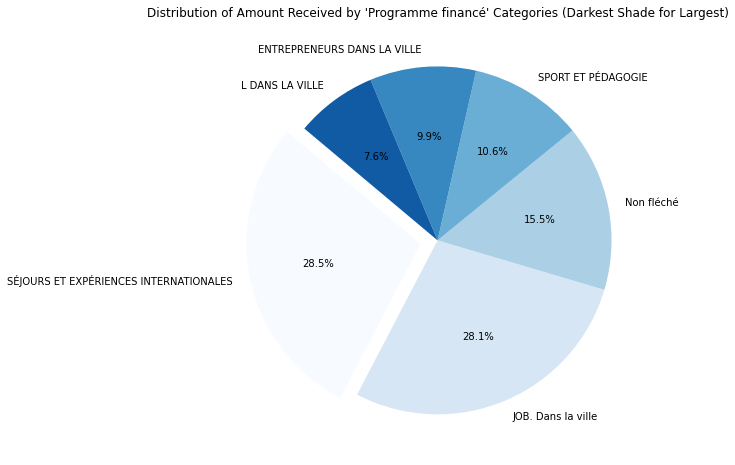

In [104]:
import matplotlib.pyplot as plt

# Create a mapping of program categories
program_categories = {
    'SÉJOURS ET EXPÉRIENCES INTERNATIONALES': ['Séjours et Camps', 'Réussite dans la Ville'],
    'SPORT ET PÉDAGOGIE': ['Sport'],
    'L DANS LA VILLE': ['L dans la Ville'],
    'JOB. Dans la ville': ['Job dans la Ville'],
    'ENTREPRENEURS DANS LA VILLE': ['Entrepreneurs dans la Ville'],
    'Non fléché': ['Non fléché']
}

# Calculate the total amount received for each program category
category_totals = {}

for category, programs in program_categories.items():
    total_amount = 0
    for program in programs:
        total_amount += program_totals.get(program, 0)
    category_totals[category] = total_amount

# Sort categories by total amount (largest first)
sorted_categories = dict(sorted(category_totals.items(), key=lambda item: item[1], reverse=True))

# Define a gradient of blue colors
num_categories = len(sorted_categories)
colors = plt.cm.Blues([i / num_categories for i in range(num_categories)])

# Create a pie chart for the program categories
labels = sorted_categories.keys()
sizes = sorted_categories.values()

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=(0.1, 0, 0, 0, 0, 0))
plt.title("Distribution of Amount Received by 'Programme financé' Categories (Darkest Shade for Largest)")

# Display the pie chart
plt.show()


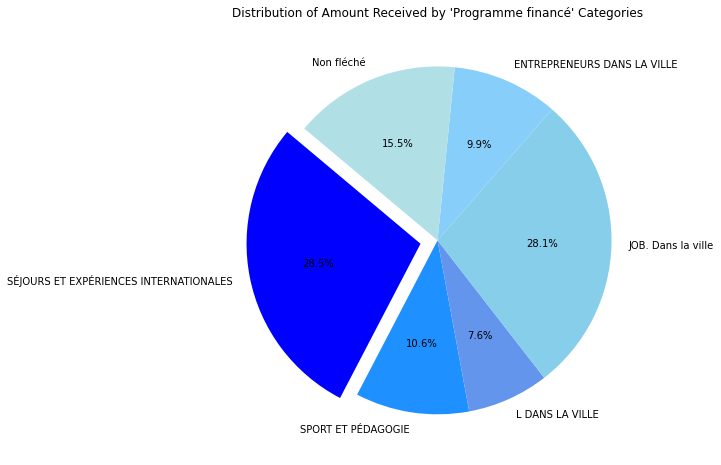

In [108]:
import matplotlib.pyplot as plt

# Create a mapping of program categories
program_categories = {
    'SÉJOURS ET EXPÉRIENCES INTERNATIONALES': ['Séjours et Camps', 'Réussite dans la Ville'],
    'SPORT ET PÉDAGOGIE': ['Sport'],
    'L DANS LA VILLE': ['L dans la Ville'],
    'JOB. Dans la ville': ['Job dans la Ville'],
    'ENTREPRENEURS DANS LA VILLE': ['Entrepreneurs dans la Ville'],
    'Non fléché': ['Non fléché']
}

# Calculate the total amount received for each program category
category_totals = {}

for category, programs in program_categories.items():
    total_amount = 0
    for program in programs:
        total_amount += program_totals.get(program, 0)
    category_totals[category] = total_amount

# Define colors for each category
colors = {
    'SÉJOURS ET EXPÉRIENCES INTERNATIONALES': '#0000FF', 
    'SPORT ET PÉDAGOGIE': '#1E90FF',
    'L DANS LA VILLE': '#6495ED',
    'JOB. Dans la ville': '#87CEEB',
    'ENTREPRENEURS DANS LA VILLE': '#87CEFA',
    'Non fléché': '#B0E0E6'
}

# Create a pie chart for the program categories
labels = category_totals.keys()
sizes = category_totals.values()

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=[colors[label] for label in labels], autopct='%1.1f%%', startangle=140, explode=(0.1, 0, 0, 0, 0, 0))
plt.title("Distribution of Amount Received by 'Programme financé' Categories")

# Save the pie chart as an image (e.g., in PNG format)
plt.savefig('pie_chart.png', format='png')

# Display the pie chart
plt.show()


TypeError: label_format() missing 1 required positional argument: 'allvals'

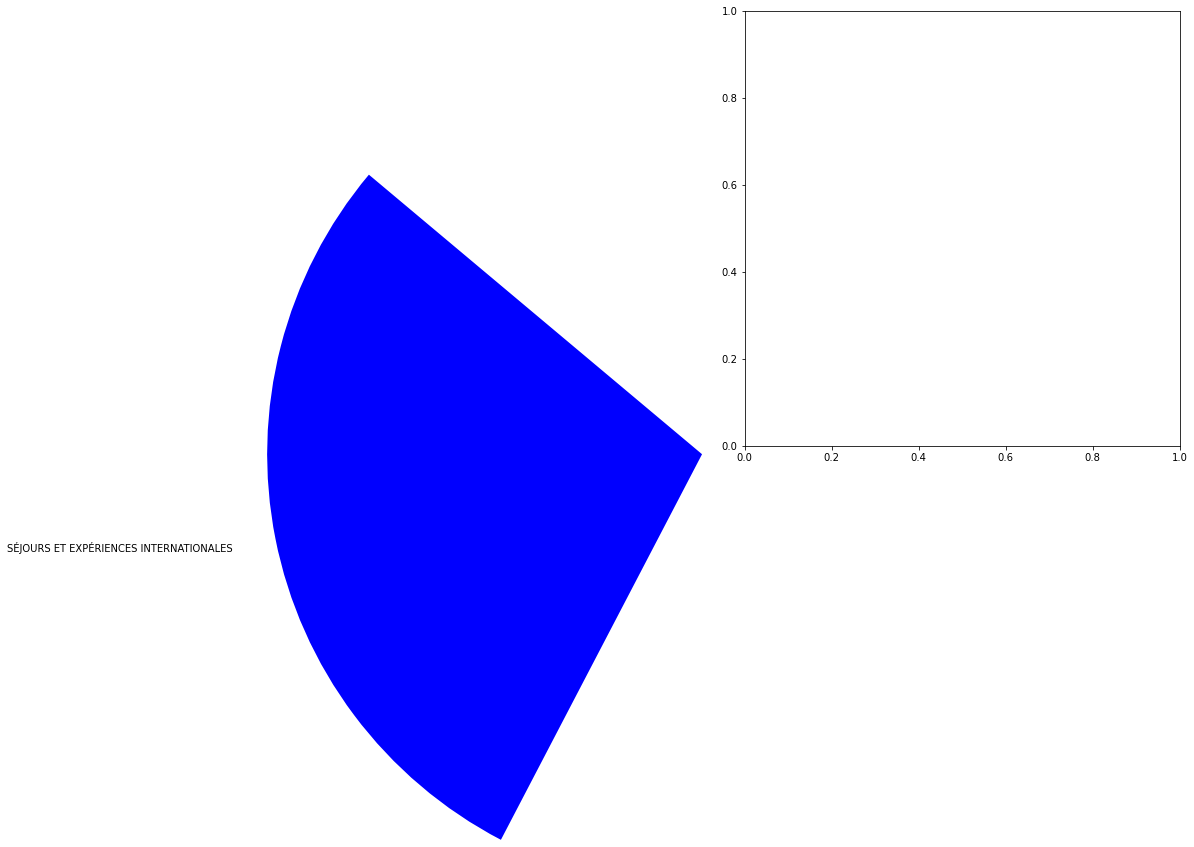